In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 한글 깨짐 방지
# 원리는 색상 폰트들에서 한글을 인식하는 폰트로 바꾸어주는 구조
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

font_kor_fixed()

#### 엑셀 부르기 및 데이터 확인

In [3]:
df = pd.read_excel('income_expenditure.xlsx')
df

,year,income,expenditure,A,B,C,D,E,F,G,H,I,J,K,L
0,2017,167.206700,137.313000,17.449600,3.035600,8.175300,24.889500,4.66190,9.038000,17.656800,6.29930,9.447200,4.299200,22.786400,9.574200
1,2018,170.237400,141.987300,18.380400,3.185000,7.529300,27.675600,5.44020,9.665500,18.071600,6.49100,10.114600,2.840000,22.499900,10.094200
2,2019,235.203800,143.624625,16.211275,3.258025,7.697400,25.973475,5.92645,10.790975,18.922125,6.21060,10.059900,3.532625,23.291525,11.750275
3,2020,233.551025,133.123800,17.805025,3.143600,6.496950,26.001600,5.79370,11.521125,12.715125,6.17535,8.615325,2.172175,22.469600,10.214200
4,2021,253.596375,141.174900,19.047825,3.309500,6.950425,26.254850,6.20805,11.959900,15.017300,6.60180,9.060300,1.989925,23.775400,10.999700


In [4]:
data = df.drop(['income' , 'expenditure'] , axis = 1)

In [5]:
data

,year,A,B,C,D,E,F,G,H,I,J,K,L
0,2017,17.449600,3.035600,8.175300,24.889500,4.66190,9.038000,17.656800,6.29930,9.447200,4.299200,22.786400,9.574200
1,2018,18.380400,3.185000,7.529300,27.675600,5.44020,9.665500,18.071600,6.49100,10.114600,2.840000,22.499900,10.094200
2,2019,16.211275,3.258025,7.697400,25.973475,5.92645,10.790975,18.922125,6.21060,10.059900,3.532625,23.291525,11.750275
3,2020,17.805025,3.143600,6.496950,26.001600,5.79370,11.521125,12.715125,6.17535,8.615325,2.172175,22.469600,10.214200
4,2021,19.047825,3.309500,6.950425,26.254850,6.20805,11.959900,15.017300,6.60180,9.060300,1.989925,23.775400,10.999700


#### 데이터 가공

In [6]:
# 데이터 행열 변환
trans_data = data.transpose()
# 데이터 칼럼명 변경
trans_data = trans_data.rename(columns = trans_data.loc['year'].astype(int).astype(str))
# 데이터 행 year(첫 줄) 삭제 - 중복 됨
trans_data = trans_data.drop(['year'] , axis = 0)
# index renewall
trans_data = trans_data.reset_index(drop = False)

# trans_data


# 예문 : df_gen_age_02.insert(loc = 6,column = '총합' , value = series_sum)
# 초기 모델 : trans_data.rename(columns = trans_data.loc['year'].astype(int)).drop(['year'] , axis = 0).reset_index(drop = False)

In [7]:
# index 칼럼 삭제
trans_data = trans_data.drop(['index'] , axis = 1)

In [8]:
# data 소수점 2자리까지 정돈
trans_data = round(trans_data , 2)

In [9]:
# 칼럼 소비지출 내역 추가 
# 반드시 위 코드를 실행 후 이 코드를 실행할 것.

from pandas import Series, DataFrame
trans_data.insert(loc = 0 , column = '소비지출 내역' , 
                  value = ['식료품 및 비주류 음료' , '주류 및 담배' , '의류 및 신발' , 
                           '주거 및 수도 광열' ,'가정용품 및 가사서비스' , '보건' , '교통' , 
                           '통신' , '오락 및 문화' , '교육' , '음식 및 숙박' , '기타 상품'])


In [10]:
# x 축 : 칼럼
# y 축 : 행 [0:11]
year = ['2017' , '2018' , '2019' , '2020' , '2020']
trans_data[year]

,2017,2018,2019,2020,2020
0,17.45,18.38,16.21,17.81,17.81
1,3.04,3.18,3.26,3.14,3.14
2,8.18,7.53,7.70,6.50,6.50
3,24.89,27.68,25.97,26.00,26.00
4,4.66,5.44,5.93,5.79,5.79
5,9.04,9.67,10.79,11.52,11.52
6,17.66,18.07,18.92,12.72,12.72
7,6.30,6.49,6.21,6.18,6.18
8,9.45,10.11,10.06,8.62,8.62
9,4.30,2.84,3.53,2.17,2.17


In [11]:
# 범례 
trans_data['소비지출 내역'].to_list()

['식료품 및 비주류 음료',
 '주류 및 담배',
 '의류 및 신발',
 '주거 및 수도 광열',
 '가정용품 및 가사서비스',
 '보건',
 '교통',
 '통신',
 '오락 및 문화',
 '교육',
 '음식 및 숙박',
 '기타 상품']

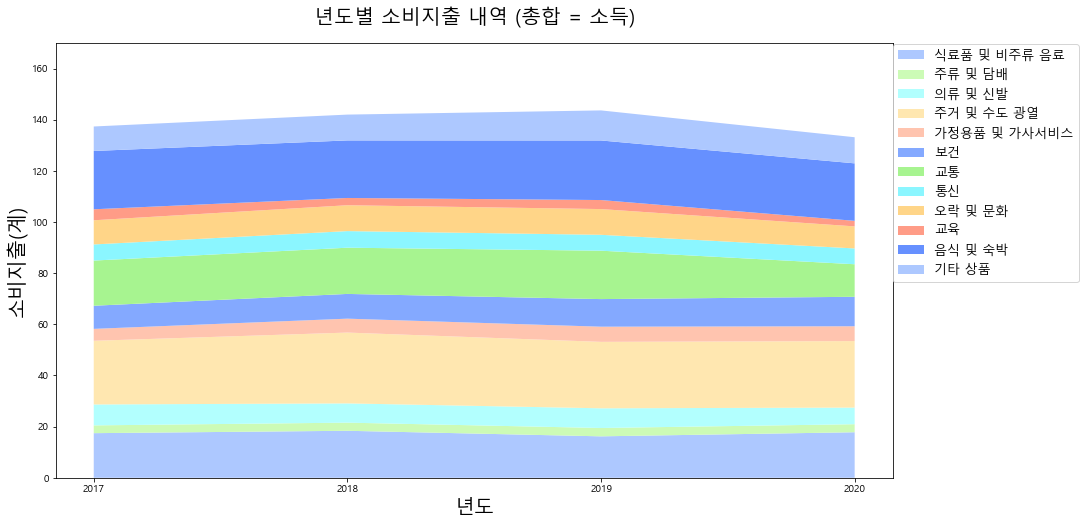

In [12]:
# 한글깨짐방지 함수 부르기
font_kor_fixed()

# 색상
colors = ['#ADC8FF' , '#CCFBB6' , '#B2FFFE' , '#FFE7B0' , '#FFC4AF' , '#84A9FF' , '#A7F490' ,
          '#8BF6FF' , '#FFD588' , '#FF9C87' , '#6690FF']

# 창 크기
plt.figure(figsize = (15, 8))

# x 축 : trans_data[year].columns -> 년도
# y 축 : [trans_data[year].loc[i].to_list() for i in range(12)] -> 다양한 지출 내역 스택
plt.stackplot(trans_data[year].columns ,
              [trans_data[year].loc[i].to_list() for i in range(12)] , colors = colors ,
              labels=trans_data['소비지출 내역'].to_list())

# labelleft/right = T/F y축 라벨링(칼럼 데이터) 위치
# 해당 키는 적용이 느립니다. (30초 정도)
plt.rc('xtick', labelsize=14 )
plt.rc('ytick', labelsize=14  , labelleft = True , labelright = False)

# y축 범위
plt.subplot().set_ylim(0 , 170)

# 라벨링 및 타이틀
plt.xlabel('년도' , fontsize = 20)
plt.ylabel('소비지출(계)' , fontsize = 20)
plt.title('년도별 소비지출 내역 (총합 = 소득)' , fontsize = 20 , pad = 20)

# 범례
plt.legend(loc=(1,0.45) , fontsize = 13)

# 저장
# bbox_inches = 'tight' -> 저장시 잘림 방지
# plt.savefig('expenditure_stacked.png', bbox_inches = 'tight')
plt.show()

#### 1인 가구 소비지출 Top 3 항목을 년도별로 비교하기

In [13]:
data

,year,A,B,C,D,E,F,G,H,I,J,K,L
0,2017,17.449600,3.035600,8.175300,24.889500,4.66190,9.038000,17.656800,6.29930,9.447200,4.299200,22.786400,9.574200
1,2018,18.380400,3.185000,7.529300,27.675600,5.44020,9.665500,18.071600,6.49100,10.114600,2.840000,22.499900,10.094200
2,2019,16.211275,3.258025,7.697400,25.973475,5.92645,10.790975,18.922125,6.21060,10.059900,3.532625,23.291525,11.750275
3,2020,17.805025,3.143600,6.496950,26.001600,5.79370,11.521125,12.715125,6.17535,8.615325,2.172175,22.469600,10.214200
4,2021,19.047825,3.309500,6.950425,26.254850,6.20805,11.959900,15.017300,6.60180,9.060300,1.989925,23.775400,10.999700


In [14]:
# data 년도별 평균 구하기
a = data.drop(['year'] , axis = 1).mean()
a

A    17.778825
B     3.186345
C     7.369875
D    26.159005
E     5.606060
F    10.595100
G    16.476590
H     6.355610
I     9.459465
J     2.966785
K    22.964565
L    10.526515
dtype: float64

In [15]:
# https://appia.tistory.com/196
# 정렬 :  index 내림차순 
# a.sort_index(ascending=False)

In [16]:
# Top3 추출을 위해 평균 값이 큰 순서대로 정렬
# 정렬 : 칼럼 내부 값 칼럼 지정시 by =[columns] 넣어주기
a.sort_values(ascending=False)

D    26.159005
K    22.964565
A    17.778825
G    16.476590
F    10.595100
L    10.526515
I     9.459465
C     7.369875
H     6.355610
E     5.606060
B     3.186345
J     2.966785
dtype: float64

In [17]:
# 데이터 정리
top_3_data = a.sort_values(ascending=False)
top_3_data = round(top_3_data , 2)

# 인덱스 초기화
top_3_data = top_3_data.reset_index(drop = False)
top_3_data

,index,0
0,D,26.16
1,K,22.96
2,A,17.78
3,G,16.48
4,F,10.60
5,L,10.53
6,I,9.46
7,C,7.37
8,H,6.36
9,E,5.61


In [18]:
# Top3 데이터 뽑기
# Top3 데이터를 list에 저장

lst_top_3_data = []

for i in range(3) :
    lst_top_3_data.extend(top_3_data['index'].loc[i])

lst_top_3_data


['D', 'K', 'A']

In [19]:
# Top3 데이터프레임 생성
# 원본 데이터 data에서 평균 Top3에 해당되는 행을 찾기위해 data의 컬럼이 lst_top_3_data인 것만 불러옵니다.
# 이후 rename을 통해 칼럼 내용 변경
df_top_3 = data[[lst_top_3_data[0] , lst_top_3_data[1] , lst_top_3_data[2]]]
df_top_3 = df_top_3.rename(columns = {'D' : '주거 및 수도광열' , 'K' : '음식 및 숙박' , 'A' : '식료품 및 비주류 음료'} ,
               index = {0 : '2017' , 1 : '2018' , 2 : '2019' , 3 : '2020' , 4 : '2021'})

In [20]:
# 데이터 확인
df_top_3

,주거 및 수도광열,음식 및 숙박,식료품 및 비주류 음료
2017,24.889500,22.786400,17.449600
2018,27.675600,22.499900,18.380400
2019,25.973475,23.291525,16.211275
2020,26.001600,22.469600,17.805025
2021,26.254850,23.775400,19.047825


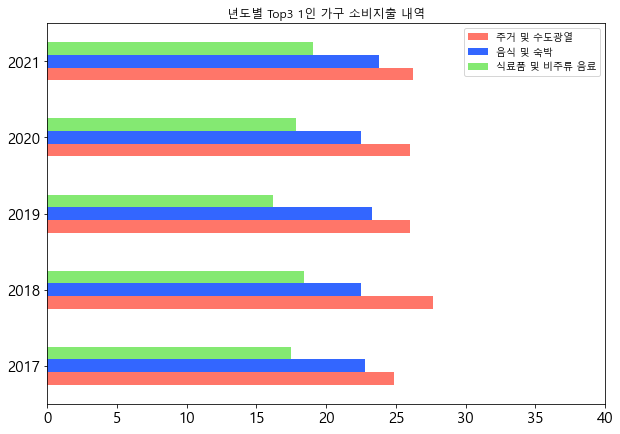

In [21]:
# dataframe.plot() 사용
# https://wikidocs.net/159927 참고
df_top_3.plot(kind = 'barh' , figsize = (10 ,7) , fontsize = 15 ,
             title = '년도별 Top3 1인 가구 소비지출 내역' , grid = False ,
             xlim  = (0 , 40) , color = ('#FF7669' , '#3366FF' , '#84E972')
             )
# plt.savefig('Top3_expenditure.png')
plt.show()

#### 년도별 1인 가구 지출 내역을 지출 내역별 평균을 내는 가로막대 그래프

In [22]:
# 데이터 추가 (컬럼) 
# 7번째에 컬럼을 '평균'이라는 작명을 하고 trans_data[year].mean(axis = 1) -> 행 평균값 을 넣어줍니다.
trans_data.insert(loc = 6 , column = '평균' , value = trans_data[year].mean(axis = 1))

In [23]:
# 필요한 컬럼인 '소비지출 내역' , '평균' 만을 슬라이싱 합니다.
# 이 때 rename()이후부터는 필요없는 작업입니다.
# 단, dataframe.plot() 사용시에는 필요합니다.
df_bar_chart = trans_data[['소비지출 내역' , '평균']].rename(index = trans_data['소비지출 내역']).drop(['소비지출 내역'], axis = 1)
df_bar_chart

,평균
식료품 및 비주류 음료,17.532
주류 및 담배,3.152
의류 및 신발,7.282
주거 및 수도 광열,26.108
가정용품 및 가사서비스,5.522
보건,10.508
교통,16.018
통신,6.272
오락 및 문화,9.372
교육,3.002


In [24]:
# 데이터 정리
df_bar_chart = df_bar_chart.sort_values(by=['평균'])
df_bar_chart

,평균
교육,3.002
주류 및 담배,3.152
가정용품 및 가사서비스,5.522
통신,6.272
의류 및 신발,7.282
오락 및 문화,9.372
기타 상품,10.366
보건,10.508
교통,16.018
식료품 및 비주류 음료,17.532


In [25]:
# 색상 코드
color = ('#FF7669' , '#3366FF' , '#84E972' , '#3FD5FF' , '#FFA93A' , '#FF7669' , 
         '#3366FF' , '#84E972' , '#3FD5FF' , '#FF7669' , '#3366FF' , '#84E972')

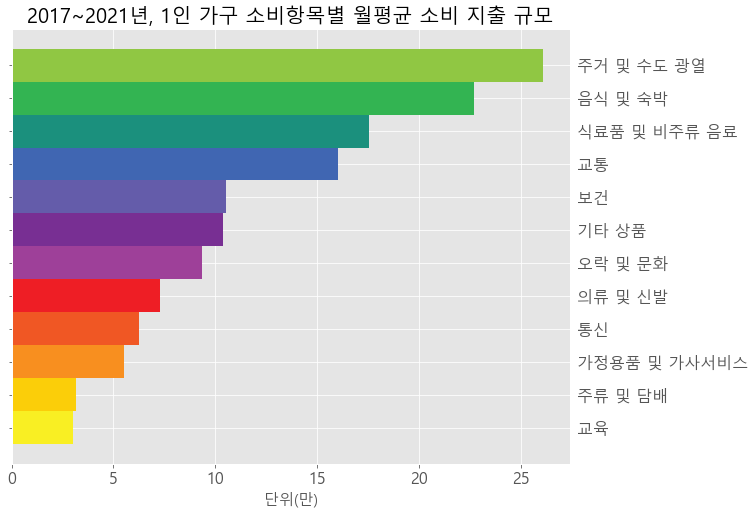

In [26]:
# 한글 깨짐 문제 해결
font_kor_fixed()

# 창 크기
plt.figure(figsize = (10, 8))

# x축 y축 데이터 컬럼 옵션 지정
# labelleft/right = F/T 라벨링을 좌/우 측에 설정
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16  , labelleft = False , labelright = True)

# 배경 'ggplot' 사용
# pt.style.use() 사용시 한글 깨짐 주의 # classic 사용 금지
# 초기화시 pt.style.use('default')
plt.style.use('ggplot')

# 가로막대 그래프 그리기 height = 1 막대 그래프의 두께
plt.barh(df_bar_chart.index , df_bar_chart['평균'] , color = ('#F9EF23', '#FBCE09', '#F88F1F', '#F05724', '#EE1E25', '#9E4099', '#782F93', '#645CAA', '#4066B2', '#1B907D', '#33B452', '#90C743') , height = 1)

# 라벨링 및 타이틀 작업
plt.xlabel('단위(만)' , fontsize = 15)
plt.title('2017~2021년, 1인 가구 소비항목별 월평균 소비 지출 규모' , fontsize = 20)

# 저장
# bbox_inches = 'tight' ->  사진 저장시 잘림 방지
plt.savefig('project_04_ppt_08.png', bbox_inches = 'tight') 
plt.show()

### plt style
- https://wikidocs.net/141547

In [27]:
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
